In [54]:
import pandas as pd

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords


import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
text = pd.read_csv("train.csv")

In [3]:
text.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
text = text.drop(["id", "author", "text"], axis = 1)

In [18]:
def clean_up(s):
    """
    Cleans up numbers, URLs, and special characters from a string.

    Args:
        s: The string to be cleaned up.

    Returns:
        A string that has been cleaned up.
    """
    s = re.sub("http[\D]+com", " " ,s)
    s = re.sub("[\W]", " " ,s)
    s = re.sub("[\d]", " ", s)
    s = s.lower()
    return s

def tokenize(s):
    """
    Tokenize a string.

    Args:
        s: String to be tokenized.

    Returns:
        A list of words as the result of tokenization.
    """
    return nltk.word_tokenize(s)

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_and_lemmatize(l):
    """
    Perform stemming and lemmatization on a list of words.

    Args:
        l: A list of strings.

    Returns:
        A list of strings after being stemmed and lemmatized.
    """
    
    lemmatizer = WordNetLemmatizer()
    ps = PorterStemmer ()
    y = [lemmatizer.lemmatize(ps.stem(w)) for w in l]
    return y

def remove_stopwords(l):
    """
    Remove English stopwords from a list of strings.

    Args:
        l: A list of strings.

    Returns:
        A list of strings after stop words are removed.
    """
    stop_words = stopwords.words('english')
    
    return str([w for w in l if w not in stop_words])


In [24]:
text["title"] = text["title"].astype("str")

In [25]:
text["processed"] = text["title"].apply(lambda x: clean_up(x))

In [28]:
text["processed"] = text["processed"].apply(lambda x: tokenize(x))

In [29]:
text["processed"] = text["processed"].apply(lambda x: stem_and_lemmatize(x))

In [32]:
text["processed"] = text["processed"].apply(lambda x: remove_stopwords(x))

In [33]:
text.head()

,title,label,processed
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,"['hous', 'dem', 'aid', 'even', 'see', 'comey',..."
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,"['flynn', 'hillari', 'clinton', 'big', 'woman'..."
2,Why the Truth Might Get You Fired,1,"['whi', 'truth', 'might', 'get', 'fire']"
3,15 Civilians Killed In Single US Airstrike Hav...,1,"['civilian', 'kill', 'singl', 'u', 'airstrik',..."
4,Iranian woman jailed for fictional unpublished...,1,"['iranian', 'woman', 'jail', 'fiction', 'unpub..."


In [48]:
from sklearn.feature_extraction.text import CountVectorizer




# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text["title"])
# summarize
#print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text["title"])
# summarize encoded vector
#print(vector.shape)
#print(type(vector))
print(vector.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents

# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text["processed"])
# summarize
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text["processed"][0]])
# summarize encoded vector
#print(vector.shape)
#print(vector.toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [68]:
reviews = text.processed.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
list = sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[4:55]

15900


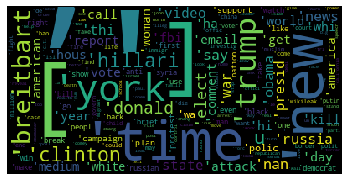

In [70]:
wordcloud = WordCloud(). generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [72]:
text.head()

,title,label,processed
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,"['hous', 'dem', 'aid', 'even', 'see', 'comey',..."
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,"['flynn', 'hillari', 'clinton', 'big', 'woman'..."
2,Why the Truth Might Get You Fired,1,"['whi', 'truth', 'might', 'get', 'fire']"
3,15 Civilians Killed In Single US Airstrike Hav...,1,"['civilian', 'kill', 'singl', 'u', 'airstrik',..."
4,Iranian woman jailed for fictional unpublished...,1,"['iranian', 'woman', 'jail', 'fiction', 'unpub..."


In [79]:
text_clean = text.drop("processed", axis = 1)

In [85]:
X_train = text_clean.loc[:19999, 'title'].values
y_train = text_clean.loc[:19999, 'label'].values
X_test = text_clean.loc[20000:, 'title'].values
y_test = text_clean.loc[20000:, 'label'].values

In [86]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(20000, 22246) (800, 22246)


<20000x22246 sparse matrix of type '<class 'numpy.float64'>'
	with 223510 stored elements in Compressed Sparse Row format>

In [87]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [90]:
from  sklearn.metrics  import accuracy_score


predicted = clf.predict(train_vectors)
print(accuracy_score(y_train,predicted))

0.94685
